# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output-data/cities.csv"

# Output File Path (png)
png_path = "../output-data/"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"{len(cities)}")

609


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


NameError: name 'url' is not defined

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
city_list = []
lat = []
lng = []
temp = []
hmdty = []
cloudi = []
wspeed = []
country = []
date = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    time.sleep(1.2)
    response = requests.get(query_url + city).json()
    try:
        
        
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hmdty.append(response['main']['humidity'])
        cloudi.append(response['clouds']['all'])
        wspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_list.append(city)
        print(f"Processing record {cities.index(city)+1} of {len(cities)} | {city}")
    
    except (ValueError, KeyError):
        print(f"Processing record {cities.index(city)+1} of {len(cities)} | {city} not found")


Processing record 1 of 609 | bluff
Processing record 2 of 609 | chillicothe
Processing record 3 of 609 | ushuaia
Processing record 4 of 609 | arraial do cabo
Processing record 5 of 609 | antalaha
Processing record 6 of 609 | codrington
Processing record 7 of 609 | rikitea
Processing record 8 of 609 | qaanaaq
Processing record 9 of 609 | saint-philippe
Processing record 10 of 609 | castro
Processing record 11 of 609 | bilma
Processing record 12 of 609 | miles city
Processing record 13 of 609 | belushya guba not found
Processing record 14 of 609 | atuona
Processing record 15 of 609 | airai
Processing record 16 of 609 | kapaa
Processing record 17 of 609 | port alfred
Processing record 18 of 609 | tuktoyaktuk
Processing record 19 of 609 | tommot
Processing record 20 of 609 | saskylakh
Processing record 21 of 609 | khonuu not found
Processing record 22 of 609 | halalo not found
Processing record 23 of 609 | taolanaro not found
Processing record 24 of 609 | kruisfontein
Processing record 25 

Processing record 201 of 609 | luena
Processing record 202 of 609 | nelson
Processing record 203 of 609 | oranjestad
Processing record 204 of 609 | padilla
Processing record 205 of 609 | pangnirtung
Processing record 206 of 609 | saint-joseph
Processing record 207 of 609 | vostok
Processing record 208 of 609 | viesca
Processing record 209 of 609 | constitucion
Processing record 210 of 609 | sinjar
Processing record 211 of 609 | springbok
Processing record 212 of 609 | itaituba
Processing record 213 of 609 | lompoc
Processing record 214 of 609 | necochea
Processing record 215 of 609 | havelock
Processing record 216 of 609 | jimma
Processing record 217 of 609 | cabo san lucas
Processing record 218 of 609 | sentyabrskiy not found
Processing record 219 of 609 | rio verde de mato grosso
Processing record 220 of 609 | regina
Processing record 221 of 609 | alta floresta
Processing record 222 of 609 | tumannyy not found
Processing record 223 of 609 | ponta do sol
Processing record 224 of 609 |

Processing record 399 of 609 | sorkjosen
Processing record 400 of 609 | morant bay
Processing record 401 of 609 | bokspits not found
Processing record 402 of 609 | tocopilla
Processing record 403 of 609 | khandyga
Processing record 404 of 609 | dera din panah not found
Processing record 405 of 609 | port macquarie
Processing record 406 of 609 | bonthe
Processing record 407 of 609 | igrim
Processing record 408 of 609 | mazamari
Processing record 409 of 609 | gizo
Processing record 410 of 609 | west wendover
Processing record 411 of 609 | najran
Processing record 412 of 609 | viedma
Processing record 413 of 609 | yulara
Processing record 414 of 609 | arman
Processing record 415 of 609 | grong
Processing record 416 of 609 | mayo
Processing record 417 of 609 | kyshtym
Processing record 418 of 609 | buala
Processing record 419 of 609 | bani
Processing record 420 of 609 | sandviken
Processing record 421 of 609 | ancud
Processing record 422 of 609 | port augusta
Processing record 423 of 609 |

Processing record 602 of 609 | manggar
Processing record 603 of 609 | lenger
Processing record 604 of 609 | haibowan not found
Processing record 605 of 609 | riwaka
Processing record 606 of 609 | mabaruma
Processing record 607 of 609 | springfield
Processing record 608 of 609 | port blair
Processing record 609 of 609 | xai-xai


## Convert Raw Data to DataFrame
* Save as csv

In [5]:
weather_df = pd.DataFrame({
    "City": city_list,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": hmdty,
    "Cloudiness": cloudi,
    "Wind Speed": wspeed,
    "Country": country,
    "Date": date
})

weather_df.to_csv(output_data_file)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.60,168.33,11.67,65,87,3.13,NZ,1602980156
1,chillicothe,39.33,-82.98,11.11,57,1,2.40,US,1602980062
2,ushuaia,-54.80,-68.30,6.00,75,75,9.30,AR,1602980158
3,arraial do cabo,-22.97,-42.03,21.63,79,2,5.03,BR,1602980160
4,antalaha,-14.90,50.28,21.12,86,42,2.87,MG,1602980161


In [6]:
weather_df = pd.read_csv(output_data_file)


In [16]:
#pd.to_datetime(arg=weather_df["Date"], errors="coerce", utc=True, format="%d/%m/%Y")
from datetime import date

graph_date = date.fromtimestamp(weather_df["Date"][0])
print(graph_date)

2020-10-17


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

In [62]:
def graphs(x_values, y_values):
    graph_labels = {
        "Lat": "Latitude",
        "Max Temp": "Max Temperature (degrees C)",
        "Humidity": "Humidity (%)",
        "Cloudiness": "Cloudiness (%)",
        "Wind Speed": "Wind Speed (m/s)"
    }
    plt.scatter(x_values, y_values, facecolors="skyblue", edgecolors="b")
    plt.xlabel(graph_labels[x_values.name])
    plt.ylabel(graph_labels[y_values.name])
    plt.title(f"City {graph_labels[y_values.name]} vs. {graph_labels[x_values.name]} ({graph_date})")

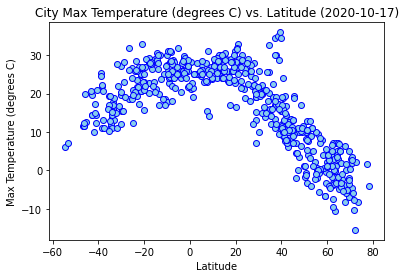

In [103]:
graphs(weather_df["Lat"],weather_df["Max Temp"])
plt.savefig(png_path+"max_temp_vs_lat.png")
plt.show()

### Latitude vs. Humidity Plot

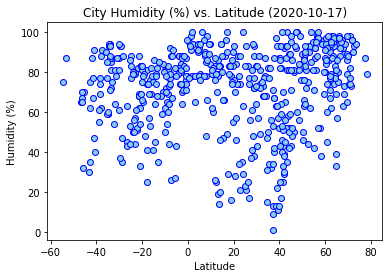

In [104]:
graphs(weather_df["Lat"],weather_df["Humidity"])
plt.savefig(png_path+"humidity_vs_lat.png")
plt.show()

### Latitude vs. Cloudiness Plot

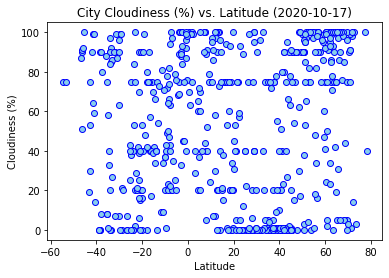

In [105]:
graphs(weather_df["Lat"],weather_df["Cloudiness"])
plt.savefig(png_path+"cloudiness_vs_lat.png")
plt.show()

### Latitude vs. Wind Speed Plot

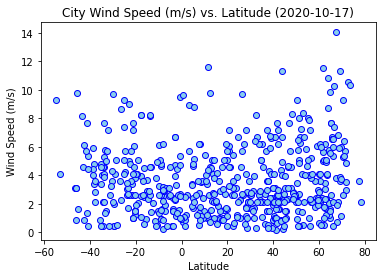

In [106]:
graphs(weather_df["Lat"],weather_df["Wind Speed"])
plt.savefig(png_path+"wind_speed_vs_lat.png")
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

In [91]:
def regressions(x_values, y_values):
    graphs(x_values,y_values)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    regress_values = x_values * slope + intercept

    plt.plot(x_values, regress_values, color="red")
    
    print(f"The data can be approximated with {line_eq}.")
    print(f"The r-value is {round(rvalue, 4)}. R-squared is {round(rvalue**2, 4)}.")

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The data can be approximated with y = -0.5x + 33.17.
The r-value is -0.8762. R-squared is 0.7677.


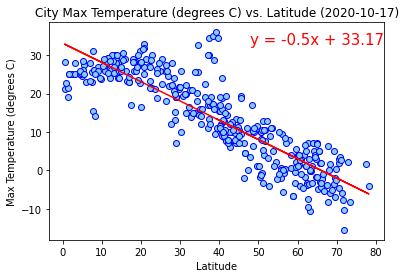

In [113]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]>0],weather_df["Max Temp"].loc[weather_df["Lat"]>0])
plt.savefig(png_path+"max_temp_vs_lat_north.png")
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The data can be approximated with y = 0.31x + 28.45.
The r-value is 0.6971. R-squared is 0.486.


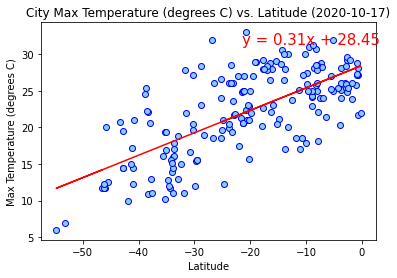

In [93]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]<0],weather_df["Max Temp"].loc[weather_df["Lat"]<0])
plt.savefig(png_path+"max_temp_vs_lat_south.png")
plt.show()

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The data can be approximated with y = 0.15x + 66.84.
The r-value is 0.13. R-squared is 0.0169.


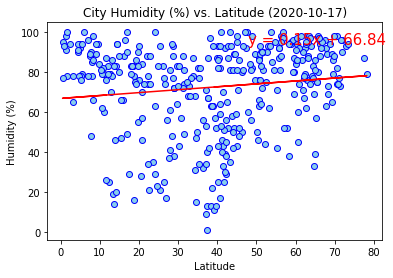

In [94]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]>0],weather_df["Humidity"].loc[weather_df["Lat"]>0])
plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The data can be approximated with y = 0.12x + 73.29.
The r-value is 0.0957. R-squared is 0.0092.


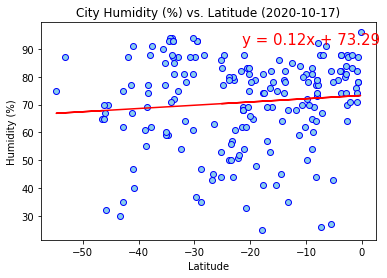

In [95]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]<0],weather_df["Humidity"].loc[weather_df["Lat"]<0])
plt.show()

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The data can be approximated with y = 0.33x + 37.7.
The r-value is 0.1672. R-squared is 0.0279.


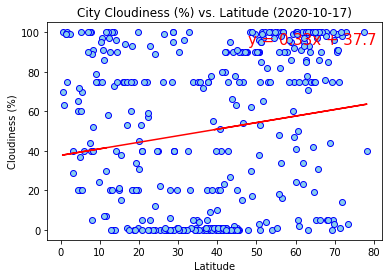

In [108]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]>0],weather_df["Cloudiness"].loc[weather_df["Lat"]>0])
plt.savefig(png_path+"cloudiness_vs_lat_north.png")
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The data can be approximated with y = 0.23x + 57.46.
The r-value is 0.0892. R-squared is 0.008.


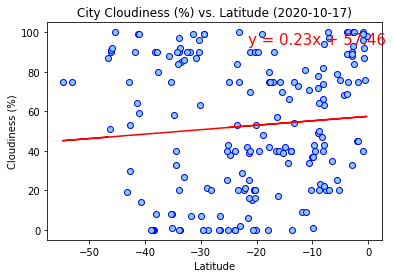

In [109]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]<0],weather_df["Cloudiness"].loc[weather_df["Lat"]<0])
plt.savefig(png_path+"cloudiness_vs_lat_south.png")
plt.show()

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The data can be approximated with y = 0.03x + 2.55.
The r-value is 0.2034. R-squared is 0.0414.


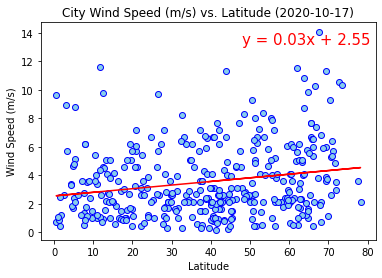

In [110]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]>0],weather_df["Wind Speed"].loc[weather_df["Lat"]>0])
plt.savefig(png_path+"wind_speed_vs_lat_north.png")
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The data can be approximated with y = -0.04x + 2.74.
The r-value is -0.2105. R-squared is 0.0443.


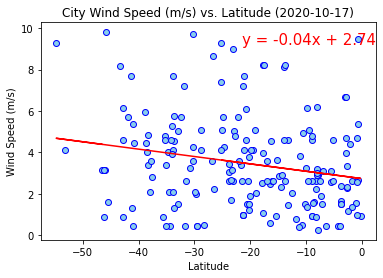

In [111]:
regressions(weather_df["Lat"].loc[weather_df["Lat"]<0],weather_df["Wind Speed"].loc[weather_df["Lat"]<0])
plt.savefig(png_path+"wind_speed_vs_lat_south.png")
plt.show()